In [27]:
import pandas as pd

import numpy as np

df = pd.read_csv('ML-EdgeIIoT-dataset.csv', low_memory=False)

In [28]:
df.head(5)

print(df['Attack_type'].value_counts())

Normal                   24301
DDoS_UDP                 14498
DDoS_ICMP                14090
Ransomware               10925
DDoS_HTTP                10561
SQL_injection            10311
Uploading                10269
DDoS_TCP                 10247
Backdoor                 10195
Vulnerability_scanner    10076
Port_Scanning            10071
XSS                      10052
Password                  9989
MITM                      1214
Fingerprinting            1001
Name: Attack_type, dtype: int64


In [29]:
from sklearn.utils import shuffle

drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4", 

         "http.file_data","http.request.full_uri","icmp.transmit_timestamp",

         "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",

         "tcp.dstport", "udp.port", "mqtt.msg"]

df.drop(drop_columns, axis=1, inplace=True)

df.dropna(axis=0, how='any', inplace=True)

df.drop_duplicates(subset=None, keep="first", inplace=True)

df = shuffle(df)

df.isna().sum()

print(df['Attack_type'].value_counts())

Normal                   24101
DDoS_UDP                 14498
DDoS_ICMP                13096
DDoS_HTTP                10495
SQL_injection            10282
DDoS_TCP                 10247
Uploading                10214
Vulnerability_scanner    10062
Password                  9972
Backdoor                  9865
Ransomware                9689
XSS                       9543
Port_Scanning             8921
Fingerprinting             853
MITM                       358
Name: Attack_type, dtype: int64


In [30]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

def encode_text_dummy(df, name):

    dummies = pd.get_dummies(df[name])

    for x in dummies.columns:

        dummy_name = f"{name}-{x}"

        df[dummy_name] = dummies[x]

    df.drop(name, axis=1, inplace=True)

encode_text_dummy(df,'http.request.method')

encode_text_dummy(df,'http.referer')

encode_text_dummy(df,"http.request.version")

encode_text_dummy(df,"dns.qry.name.len")

encode_text_dummy(df,"mqtt.conack.flags")

encode_text_dummy(df,"mqtt.protoname")

encode_text_dummy(df,"mqtt.topic")

In [31]:
df

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,tcp.ack_raw,...,dns.qry.name.len-_googlecast._tcp.local,mqtt.conack.flags-0,mqtt.conack.flags-0.0,mqtt.conack.flags-0x00000000,mqtt.protoname-0,mqtt.protoname-0.0,mqtt.protoname-MQTT,mqtt.topic-0,mqtt.topic-0.0,mqtt.topic-Temperature_and_Humidity
48280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,121.0,7.555694e+07,...,0,0,1,0,0,1,0,0,1,0
127770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.893268e+08,...,0,1,0,0,1,0,0,1,0,0
144107,0.0,0.0,16513.0,30576.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,0,0,1,0,0,1,0,0,1,0
89164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16641.0,2.692072e+09,...,0,0,1,0,0,1,0,0,1,0
102668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,486.0,2.491637e+09,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.080745e+09,...,0,0,1,0,0,1,0,0,1,0
81124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47517.0,4.206245e+09,...,0,0,1,0,0,1,0,0,1,0
31522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,478.0,2.474126e+09,...,0,0,1,0,0,1,0,0,1,0
110915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.179112e+08,...,0,1,0,0,1,0,0,1,0,0


In [32]:

df['Attack_type'].value_counts()

Normal                   24101
DDoS_UDP                 14498
DDoS_ICMP                13096
DDoS_HTTP                10495
SQL_injection            10282
DDoS_TCP                 10247
Uploading                10214
Vulnerability_scanner    10062
Password                  9972
Backdoor                  9865
Ransomware                9689
XSS                       9543
Port_Scanning             8921
Fingerprinting             853
MITM                       358
Name: Attack_type, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152196 entries, 48280 to 56248
Data columns (total 76 columns):
 #   Column                                                                             Non-Null Count   Dtype  
---  ------                                                                             --------------   -----  
 0   arp.opcode                                                                         152196 non-null  float64
 1   arp.hw.size                                                                        152196 non-null  float64
 2   icmp.checksum                                                                      152196 non-null  float64
 3   icmp.seq_le                                                                        152196 non-null  float64
 4   icmp.unused                                                                        152196 non-null  float64
 5   http.content_length                                                                152196 

In [34]:
feat_cols = list(df.columns)
label_col = "Attack_type"

feat_cols.remove(label_col)
feat_cols

['arp.opcode',
 'arp.hw.size',
 'icmp.checksum',
 'icmp.seq_le',
 'icmp.unused',
 'http.content_length',
 'http.response',
 'http.tls_port',
 'tcp.ack',
 'tcp.ack_raw',
 'tcp.checksum',
 'tcp.connection.fin',
 'tcp.connection.rst',
 'tcp.connection.syn',
 'tcp.connection.synack',
 'tcp.flags',
 'tcp.flags.ack',
 'tcp.len',
 'tcp.seq',
 'udp.stream',
 'udp.time_delta',
 'dns.qry.name',
 'dns.qry.qu',
 'dns.qry.type',
 'dns.retransmission',
 'dns.retransmit_request',
 'dns.retransmit_request_in',
 'mqtt.conflag.cleansess',
 'mqtt.conflags',
 'mqtt.hdrflags',
 'mqtt.len',
 'mqtt.msg_decoded_as',
 'mqtt.msgtype',
 'mqtt.proto_len',
 'mqtt.topic_len',
 'mqtt.ver',
 'mbtcp.len',
 'mbtcp.trans_id',
 'mbtcp.unit_id',
 'Attack_label',
 'http.request.method-0',
 'http.request.method-0.0',
 'http.request.method-GET',
 'http.request.method-OPTIONS',
 'http.request.method-POST',
 'http.request.method-TRACE',
 'http.referer-() { _; } >_[$($())] { echo 93e4r0-CVE-2014-6278: true; echo;echo; }',
 'htt

In [35]:
len(feat_cols)

75

In [36]:
empty_cols = [col for col in df.columns if df[col].isnull().all()]
empty_cols

[]

In [37]:
from matplotlib import pyplot as plt
import seaborn as sns

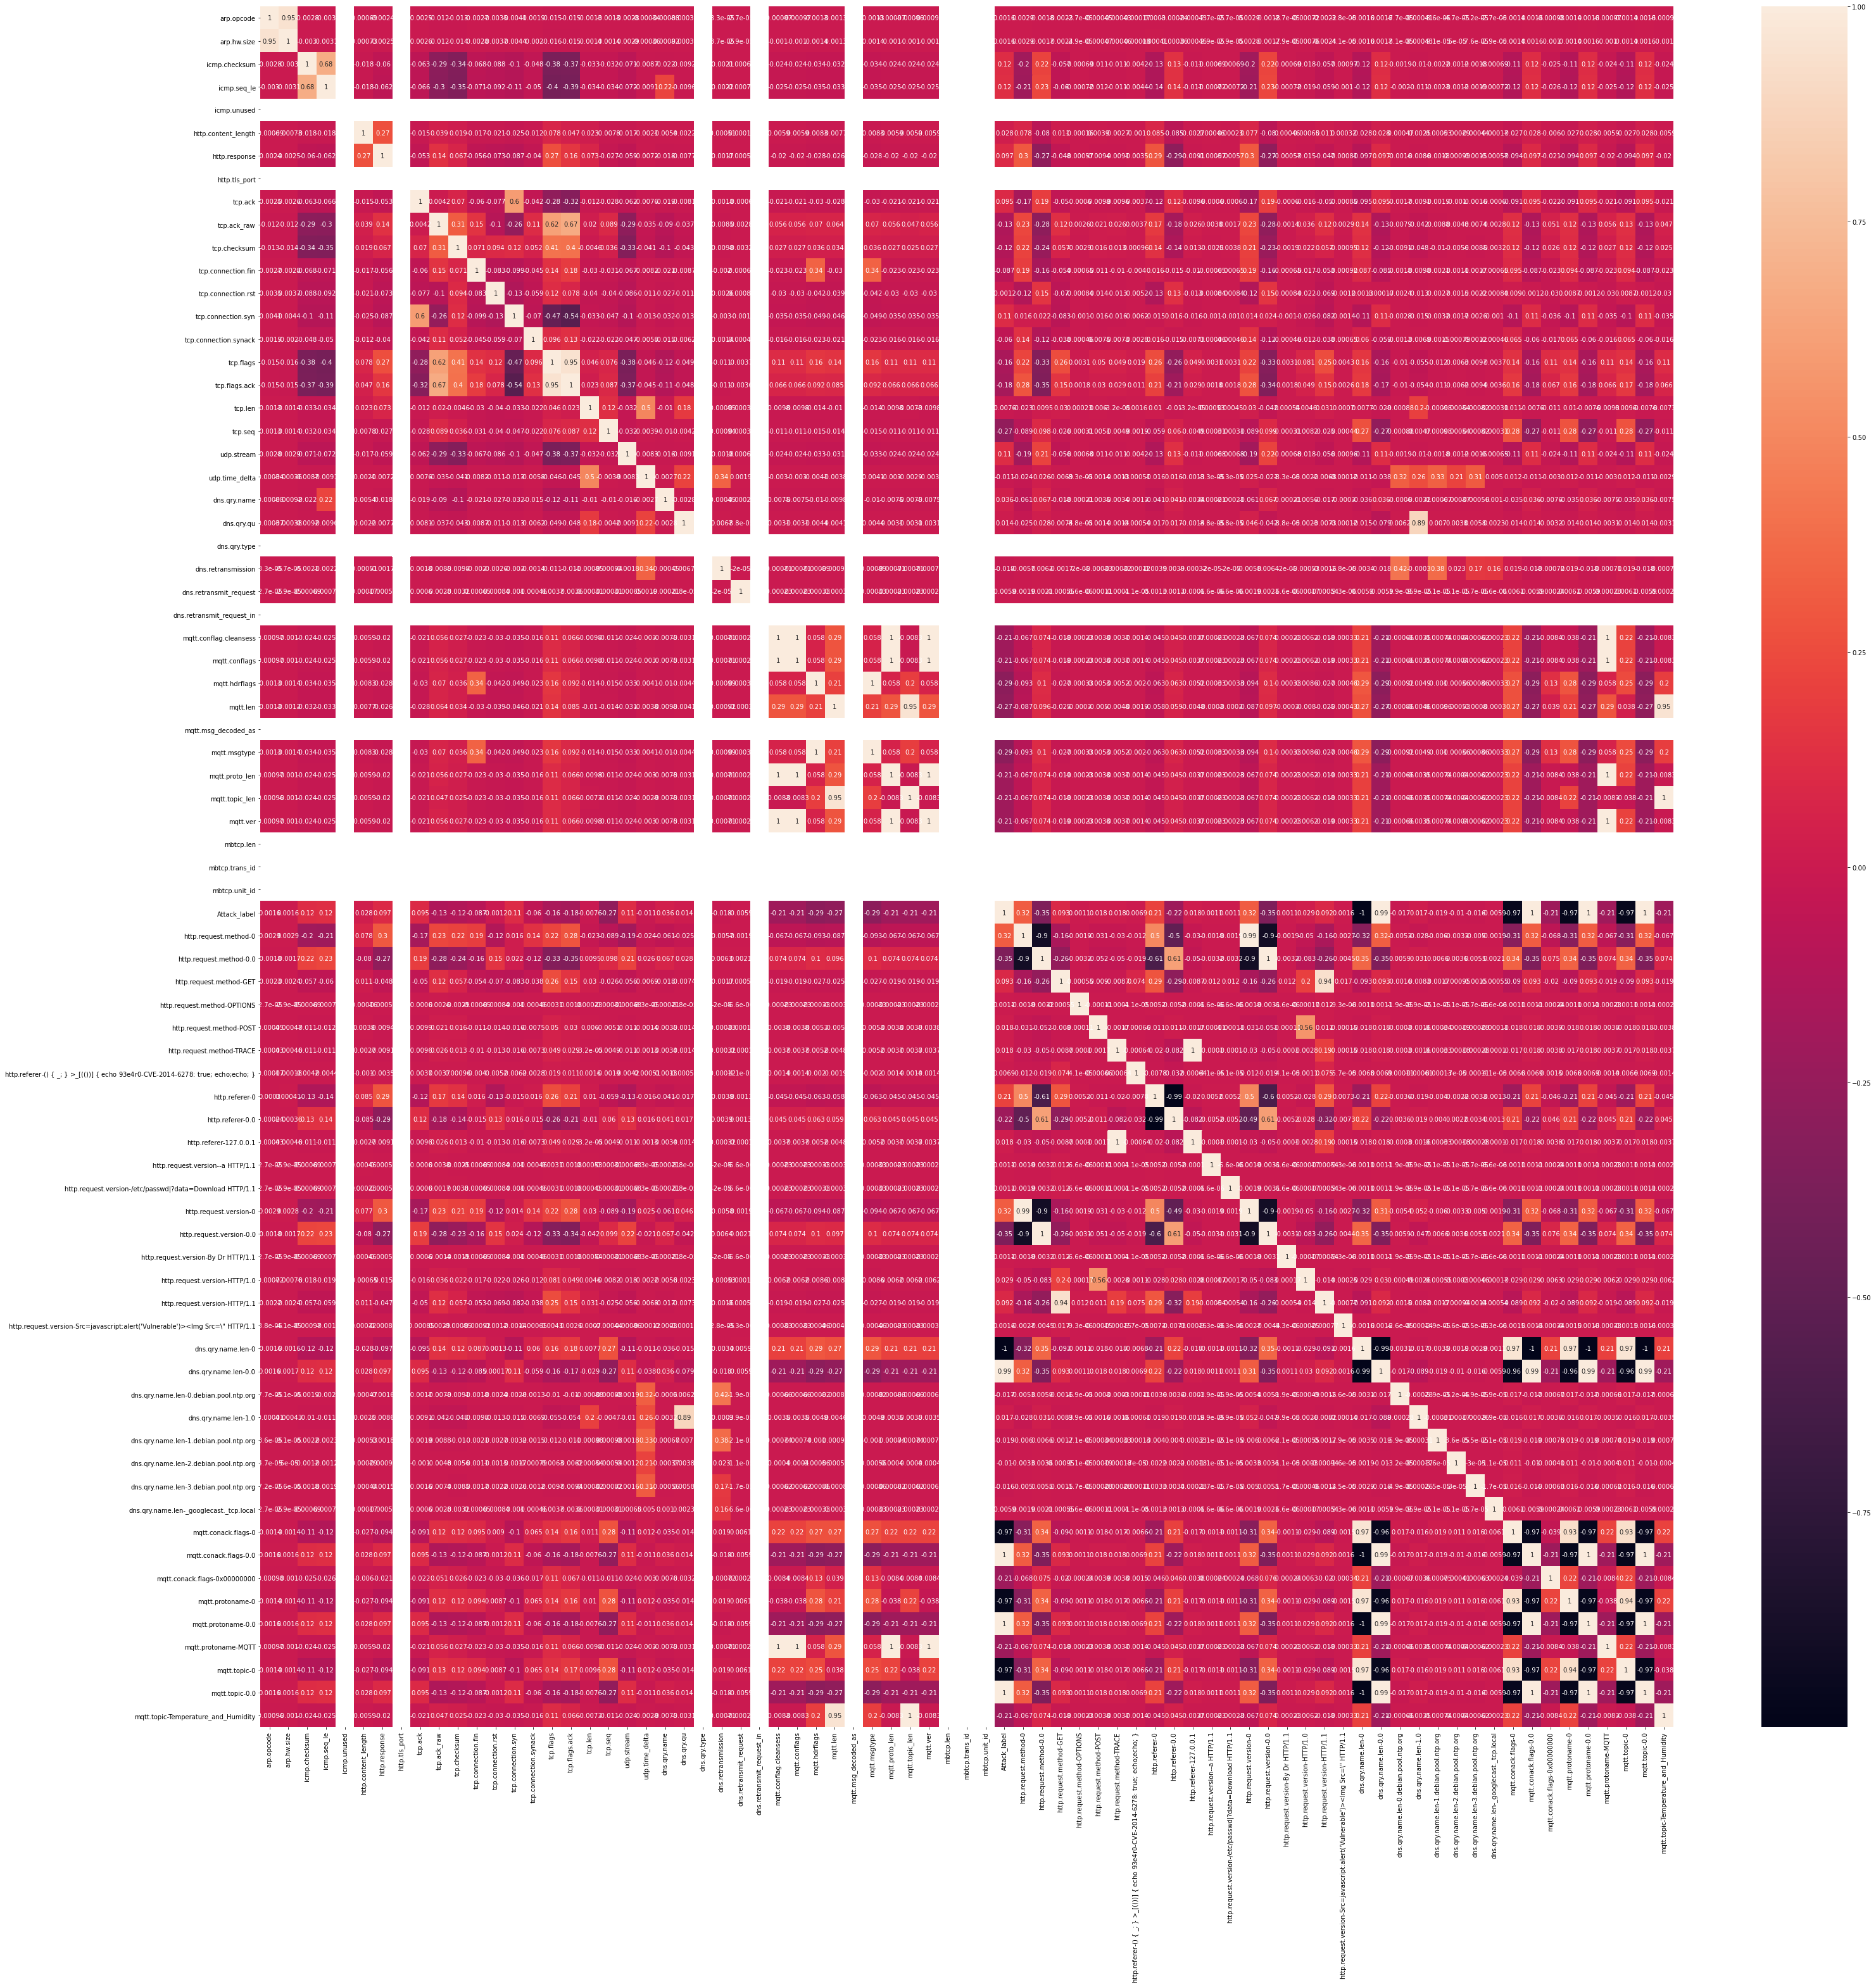

In [38]:
corr_matrix = df[feat_cols].corr()
fig = plt.figure(figsize=(50,50))
sns.heatmap(corr_matrix, annot=True)

In [39]:
skip_list = ["icmp.unused", "http.tls_port", "dns.qry.type", "mqtt.msg_decoded_as"]

In [40]:
df[skip_list[3]].value_counts()

0.0    152196
Name: mqtt.msg_decoded_as, dtype: int64

In [41]:
df.drop(skip_list, axis=1, inplace=True)
feat_cols = list(df.columns)
feat_cols.remove(label_col)
feat_cols

['arp.opcode',
 'arp.hw.size',
 'icmp.checksum',
 'icmp.seq_le',
 'http.content_length',
 'http.response',
 'tcp.ack',
 'tcp.ack_raw',
 'tcp.checksum',
 'tcp.connection.fin',
 'tcp.connection.rst',
 'tcp.connection.syn',
 'tcp.connection.synack',
 'tcp.flags',
 'tcp.flags.ack',
 'tcp.len',
 'tcp.seq',
 'udp.stream',
 'udp.time_delta',
 'dns.qry.name',
 'dns.qry.qu',
 'dns.retransmission',
 'dns.retransmit_request',
 'dns.retransmit_request_in',
 'mqtt.conflag.cleansess',
 'mqtt.conflags',
 'mqtt.hdrflags',
 'mqtt.len',
 'mqtt.msgtype',
 'mqtt.proto_len',
 'mqtt.topic_len',
 'mqtt.ver',
 'mbtcp.len',
 'mbtcp.trans_id',
 'mbtcp.unit_id',
 'Attack_label',
 'http.request.method-0',
 'http.request.method-0.0',
 'http.request.method-GET',
 'http.request.method-OPTIONS',
 'http.request.method-POST',
 'http.request.method-TRACE',
 'http.referer-() { _; } >_[$($())] { echo 93e4r0-CVE-2014-6278: true; echo;echo; }',
 'http.referer-0',
 'http.referer-0.0',
 'http.referer-127.0.0.1',
 'http.reques

In [42]:
X = df.drop([label_col], axis=1)
y = df[label_col]

del df

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

del X
del y

In [44]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train =  label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [45]:
label_encoder.classes_

array(['Backdoor', 'DDoS_HTTP', 'DDoS_ICMP', 'DDoS_TCP', 'DDoS_UDP',
       'Fingerprinting', 'MITM', 'Normal', 'Password', 'Port_Scanning',
       'Ransomware', 'SQL_injection', 'Uploading',
       'Vulnerability_scanner', 'XSS'], dtype=object)

In [46]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train =  min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [47]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state = 0)  
classifier.fit(X_train, y_train)  

c:\Users\91884\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [49]:
y_pred = classifier.predict(X_test)  

In [50]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[1424    0    0   70    0    0    0    0    0   51  428    0    0    0
     0]
 [   0 1273    0    0    0    0    0    0    0    0    0    0    0   32
   794]
 [   0    0 2603    0   16    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0 1201    0    0    0    0    0  848    0    0    0    0
     0]
 [   0    0   22    0 2878    0    0    0    0    0    0    0    0    0
     0]
 [   0    0  105   25   12    0    0    0    0   29    0    0    0    0
     0]
 [   0    0    0    0    0    0   72    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0 4820    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0 1358    0    0  467  169    0
     0]
 [   0    0    0  890    0    0    0    0    0  894    0    0    0    0
     0]
 [1235    0    0  141    0    0    0    0    0   73  489    0    0    0
     0]
 [   0    0    0    0    0    0    0    0 1145    0    0  708  204    0
     0]
 [   0    0    0    0    0    0    0    

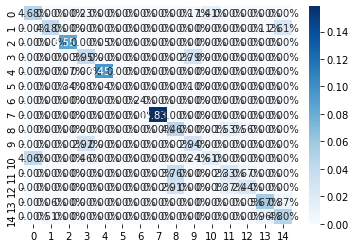

In [51]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

In [52]:
# accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# print("The accuracy of the model is:",accuracy_score(y_test, y_pred)*100,"%")

0.7112680683311432

In [64]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=15, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=15)

In [65]:
y_pred= classifier.predict(X_test) 

In [66]:
# accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# print("The accuracy of the model is:",accuracy_score(y_test, y_pred)*100,"%")

0.7650131406044678

In [104]:
# Step 2: Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Step 3: Define model parameters
n_estimators = 100
max_depth = 100
max_features = 'sqrt'
random_state = 42
model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                               max_features=max_features, random_state=random_state)

# Step 4: Train the model on the training data
model.fit(X_train, y_train)

# Step 5: Generate predictions for the testing data
y_pred = model.predict(X_test)

In [105]:
accuracy_score(y_test, y_pred)

0.881011826544021

In [102]:
# Step 2: Import necessary libraries
from sklearn.tree import DecisionTreeClassifier

# Step 3: Define model parameters
max_depth = 100
criterion = 'entropy'
random_state = 42
model = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, random_state=random_state)

# Step 4: Train the model on the training data
model.fit(X_train, y_train)

# Step 5: Generate predictions for the testing data
y_pred = model.predict(X_test)


In [103]:
accuracy_score(y_test, y_pred)

0.8842641261498029

In [139]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    keras.layers.Dense(256, input_shape=(71,), activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(15, activation='softmax')
])

In [140]:
model.save_weights('./checkpoints/') # to save weights in the middle of a session

In [141]:
# Compiling the model
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [142]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [144]:
# fitting the model
model.fit(X_train, y_train, epochs=20, batch_size=256)

Epoch 1/20
476/476 [==============================] - 2s 4ms/step - loss: 0.3600 - accuracy: 0.8188
Epoch 2/20
476/476 [==============================] - 2s 4ms/step - loss: 0.3585 - accuracy: 0.8176
Epoch 3/20
476/476 [==============================] - 2s 4ms/step - loss: 0.3618 - accuracy: 0.8167
Epoch 4/20
476/476 [==============================] - 1s 3ms/step - loss: 0.3540 - accuracy: 0.8193
Epoch 5/20
476/476 [==============================] - 1s 2ms/step - loss: 0.3528 - accuracy: 0.8197
Epoch 6/20
476/476 [==============================] - 1s 3ms/step - loss: 0.3591 - accuracy: 0.8179
Epoch 7/20
476/476 [==============================] - 1s 2ms/step - loss: 0.3586 - accuracy: 0.8178
Epoch 8/20
476/476 [==============================] - 1s 2ms/step - loss: 0.3527 - accuracy: 0.8202
Epoch 9/20
476/476 [==============================] - 1s 2ms/step - loss: 0.3503 - accuracy: 0.8203
Epoch 10/20
476/476 [==============================] - 1s 2ms/step - loss: 0.3682 - accuracy: 0.8159